In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 9.9 MB/s eta 0:00:0000:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yahooquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

from re import search
from yahooquery import Screener

In [5]:
data = yf.download(tickers='ETH-USD', period = '1d', interval = '5m')


[*********************100%***********************]  1 of 1 completed


In [6]:
print(data["Open"])

Datetime
2022-12-29 00:00:00    1190.010132
2022-12-29 00:05:00    1190.333008
2022-12-29 00:10:00    1191.341919
2022-12-29 00:15:00    1191.164429
2022-12-29 00:20:00    1190.383301
                          ...     
2022-12-29 22:20:00    1195.982910
2022-12-29 22:25:00    1196.660645
2022-12-29 22:30:00    1197.145508
2022-12-29 22:35:00    1196.530518
2022-12-29 22:40:00    1198.882935
Name: Open, Length: 273, dtype: float64


In [7]:
def getRates(ticker_input ,period_input  ,interval_input ):
    print(ticker_input+" "+period_input+" "+interval_input )
    data = yf.download(tickers=ticker_input, period = period_input, interval = interval_input)
    return data["Open"] 

In [8]:
def getPercChange(d):
    x=round(d.head(1),6).values
    y=round(d.tail(1),6).values
    perc_chg= np.round( (  (y-x) / abs(x)  ) *100  , 4)
    return perc_chg


In [59]:
def mail2me(pair_text,message_text):
    from email.message import EmailMessage
    import smtplib

    sender = "ozukun83@gmail.com"
    recipient = "ozukun83@gmail.com"
    message = "Crypto Info all"

    #password = input("Type your password and press enter: ")
    password ="o m h c a p w m m w u d "
    email = EmailMessage()
    email["From"] = sender
    email["To"] = recipient
    email["Subject"] = "Crypto Rates Python!"+"  "+pair_text
    email.set_content(message_text)

    smtp = smtplib.SMTP_SSL("smtp.gmail.com")
    smtp.login(sender, password)
    smtp.sendmail(sender, recipient, email.as_string())
    smtp.quit()
    print("Mail succeed !!")


In [60]:
# ETH-USD  GET CHANGES FOR 3MONTHS - 1 MONTH -1 WEEK INTERVALS

df3mo=getRates('ETH-USD',  '3mo',  '1h')
print(  getPercChange(df3mo) )
message_input0="ETH-USD',  '3mo',  '1h' CHANGE % " +str( getPercChange(df3mo)[0])

df1mo=getRates('ETH-USD',  '1mo',  '1h')
print(  getPercChange(df1mo) )
message_input1="ETH-USD',  '1mo',  '1h' CHANGE % " +str( getPercChange(df1mo)[0])

dfwk=getRates('ETH-USD',  '1wk',  '1h')
print(  getPercChange(dfwk) )
message_input2="ETH-USD',  '1wk',  '1h' CHANGE % " +str( getPercChange(dfwk)[0])

message_input=message_input0+"\n"+message_input1+"\n"+message_input2

mail2me("ETH-USD",message_input)

ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
[-9.8033]
ETH-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
[-1.8188]
ETH-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
[-1.4208]
Mail succeed !!


In [11]:
# ALGO-USD  GET CHANGES FOR 3MONTHS - 1 MONTH -1 WEEK INTERVALS

df3mo=getRates('ALGO-USD',  '3mo',  '1h')
print(  getPercChange(df3mo) )
message_input0="ALGO-USD',  '3mo',  '1h' CHANGE % " +str( getPercChange(df3mo)[0])

df1mo=getRates('ALGO-USD',  '1mo',  '1h')
print(  getPercChange(df1mo) )
message_input1="ALGO-USD',  '1mo',  '1h' CHANGE % " +str( getPercChange(df1mo)[0])

dfwk=getRates('ALGO-USD',  '1wk',  '1h')
print(  getPercChange(dfwk) )
message_input2="ALGO-USD',  '1wk',  '1h' CHANGE % " +str( getPercChange(dfwk)[0])

message_input=message_input0+"\n"+message_input1+"\n"+message_input2

#mail2me("ALGO-USD",message_input)

ALGO-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
[-54.0349]
ALGO-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
[-32.7873]
ALGO-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
[-5.2678]


In [81]:
# get all crypto pairs with USD
def getCryptoPairs():
    s = Screener()
    tickers=[]
    data = s.get_screeners('all_cryptocurrencies_us', count=10)

    # data is in the quotes key
    dicts = data['all_cryptocurrencies_us']['quotes']
    symbols = [d['symbol'] for d in dicts]
    symbols[0]

    for s in symbols:
        if  search("USD", s) and not search("USDT", s) and not search("USDC", s): #\
        #and ( search("ETH",s) or search("DOGE",s) ):
            #print(s+"\n")
            tickers.append(s)
             
    return tickers
        

for cp in getCryptoPairs():
    print(cp)

BTC-USD
ETH-USD
BNB-USD
XRP-USD
BUSD-USD
DOGE-USD
ADA-USD
MATIC-USD


In [80]:
Crypto_Pairs=["BTC-USD","ETH-USD","ALGO-USD","SOL-USD","LUNC-USD","ROSE-USD","SHIB-USD","FTT-USD","ADA-USD"]

message_input=""
final_message=""
for cp in Crypto_Pairs:
    print(cp)
    df_tmp=getRates(cp,  '3mo',  '1h')
    message_input=cp+"   First: "+str( round( df_tmp.head(1)[0] ,6 ) )+"  "+"Last: "+str( round(df_tmp.tail(1)[0] ,6)  )
    df3mo=getRates(cp,  '3mo',  '1h')
    message_input0=cp+"  '3mo',  '1h' CHANGE % " +str( getPercChange(df3mo)[0])
    
    df1mo=getRates(cp,  '1mo',  '1h')
    message_input1=cp+"  '1mo',  '1h' CHANGE % " +str( getPercChange(df1mo)[0])
    
    dfwk=getRates(cp,'1wk',  '1h')
    message_input2=cp+"  '1wk',  '1h' CHANGE % " +str( getPercChange(dfwk)[0])
    
    message_input=message_input+"\n"+message_input0+"\n"+message_input1+"\n"+message_input2+"\n"+"\n"
    final_message=final_message+message_input
    print(final_message)
    
    
mail2me("All Crypto Pairs",final_message) 


BTC-USD
BTC-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
BTC-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
BTC-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
BTC-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
BTC-USD   First: 19573.224609  Last: 16641.330078
BTC-USD  '3mo',  '1h' CHANGE % -14.9791
BTC-USD  '1mo',  '1h' CHANGE % 1.1909
BTC-USD  '1wk',  '1h' CHANGE % -1.1189


ETH-USD
ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed
ETH-USD 1mo 1h
[*********************100%***********************]  1 of 1 completed
ETH-USD 1wk 1h
[*********************100%***********************]  1 of 1 completed
BTC-USD   First: 19573.224609  Last: 16641.330078
BTC-USD  '3mo',  '1h' CHANGE % -14.9791
BTC-USD  '1mo',  '1h' CHANGE % 1.1909
BTC-USD  '1wk',

In [13]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def getLine(df_input):
    x = df_input.index
    y = df_input.values
    fig = go.Figure(data=go.Scatter(x = x, y = y))
    fig.show()
    

ETH-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed


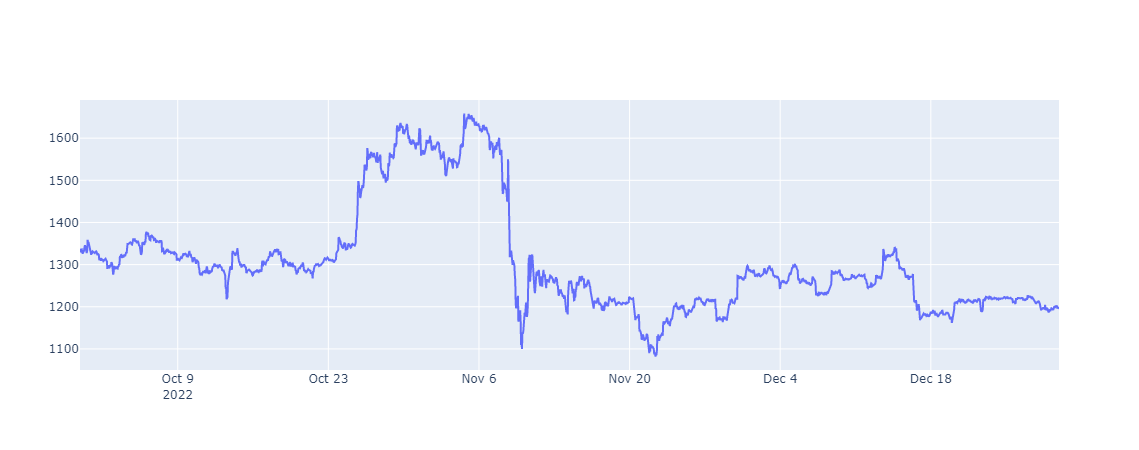

ALGO-USD 3mo 1h
[*********************100%***********************]  1 of 1 completed


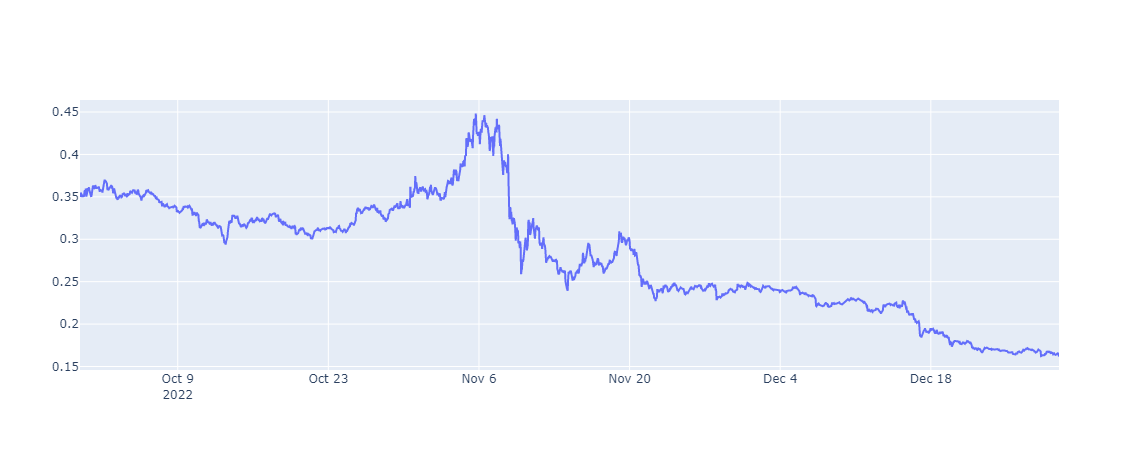

In [14]:
( getLine(getRates('ETH-USD',  '3mo',  '1h')) )
( getLine(getRates('ALGO-USD',  '3mo',  '1h')) )